In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
import pandas as pd


In [6]:
# Read in the geometry data from a GeoJSON file
geometry = gpd.read_file('data_raw/utils.geojson') 

In [7]:
# Read in the shop locations from a CSV file
shops_df = pd.read_csv('data_raw/drugscords.csv')
shops_df['geometry'] = shops_df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
shops_gdf = gpd.GeoDataFrame(shops_df, geometry='geometry')

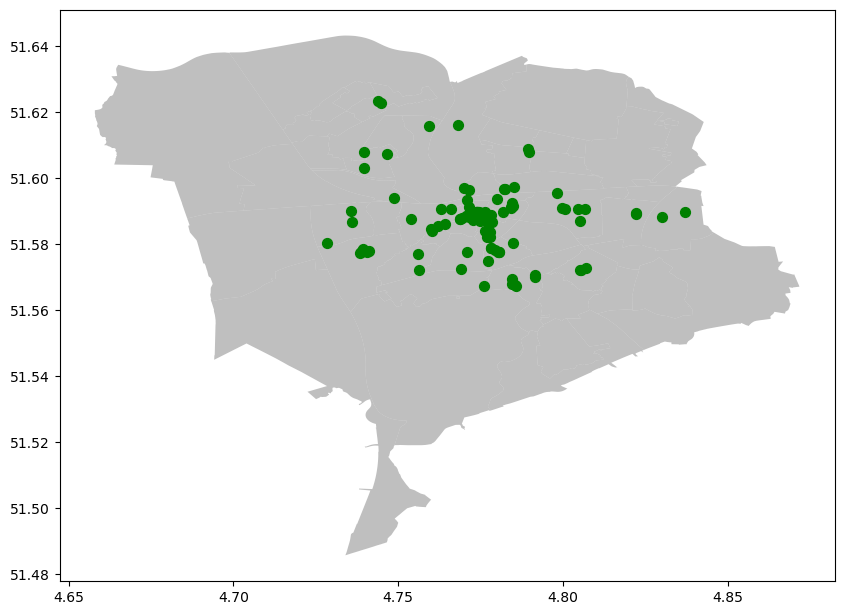

In [8]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the map data
geometry.plot(ax=ax, alpha=0.5, color='grey')

# Plot the shop locations
shops_gdf.plot(ax=ax, color='green', markersize=50)

# Show the plot
plt.show()

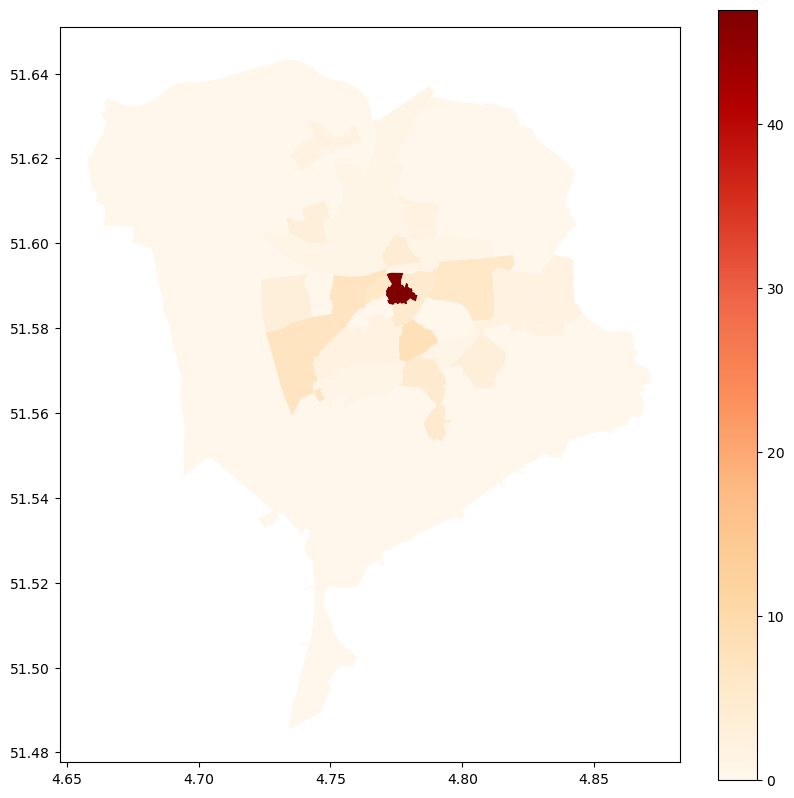

In [9]:
# Create a new column in the geometry dataframe that represents some sort of concentration metric
geometry['concentration'] = 0

# Calculate the concentration of shops within each geometry polygon
for i, row in geometry.iterrows():
    concentration = shops_gdf[shops_gdf.within(row['geometry'])].shape[0]
    geometry.at[i, 'concentration'] = concentration

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the heat map
geometry.plot(column='concentration', cmap='OrRd', ax=ax, legend=True)

# Show the plot
plt.show()